<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction import text


In [103]:
import json 
# JSON file

with open ('pan20-authorship-verification-training-small.jsonl', "r") as json_file:
    json_list = list(json_file)

list_of_results = []
for json_str in json_list:
    result = json.loads(json_str)
    list_of_results.append(result)

df_texts = pd.DataFrame(list_of_results)


In [95]:
# df_texts = df_texts[:100]

In [104]:
# add code to separate authors
stop = stopwords.words('english')

df_texts['text_1'] = df_texts['pair'].apply(lambda x: x[0] )
df_texts['text_2'] = df_texts['pair'].apply(lambda x: x[1] )
df_texts['text_1'] = df_texts['text_1'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_texts['text_2'] = df_texts['text_2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


df_texts.head()
df_texts[['id','text_1','text_2']].to_csv('df_texts.csv', index=False)

In [75]:
import json 
# JSON file

with open ('pan20-authorship-verification-training-small-truth.jsonl', "r") as json_file:
    json_list = list(json_file)

list_of_results = []
for json_str in json_list:
    result = json.loads(json_str)
    list_of_results.append(result)


In [76]:
df_pairs = pd.DataFrame(list_of_results)

# add code to separate authors
df_pairs['author_1'] = df_pairs['authors'].apply(lambda x: x[0] )
df_pairs['author_2'] = df_pairs['authors'].apply(lambda x: x[1] )
df_pairs.to_csv('df_pairs.csv', index=False)

Text(0.5, 0.98, 'Number of texts per author')

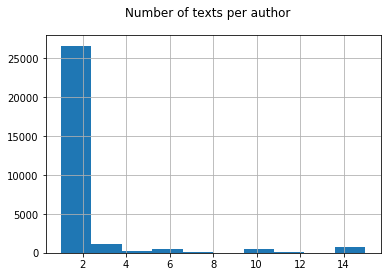

In [56]:
all_authors = list(df_pairs['author_1'].unique()) + list(df_pairs['author_2'].unique())
df_pairs.groupby('author_2').size().hist()
plt.suptitle('Number of texts per author')

In [85]:
df_texts

,fandoms,id,pair,text_1,text_2
0,"[Guardians of Ga'Hoole, Hetalia - Axis Powers]",6cced668-6e51-5212-873c-717f2bc91ce6,"[I shift a bit, warily letting my eyes dart fr...","I shift a bit, warily letting my eyes dart fro...","""All will become one with Russia,"" he said, al..."
1,"[Guardians of Ga'Hoole, Warriors]",3c6c188a-db28-59aa-8c09-3d0f799ff579,"[I shift a bit, warily letting my eyes dart fr...","I shift a bit, warily letting my eyes dart fro...","Suddenly, a piece of ice falls into the pit of..."
2,"[Guardians of Ga'Hoole, Xiaolin Showdown]",b0cfa94f-c9ec-5aa5-8331-a5a249b664cf,[A single tear escaped me as I left. I did hav...,A single tear escaped me as I left. I did have...,"got the Yang yoyo."" Kimiko pulled the other ha..."
3,"[Hetalia - Axis Powers, Warriors]",e6e86e73-9a7b-58f2-a652-a17b4a1bcabf,"[""Ja."" Ludwig kept his gaze upon her, solidly....","""Ja."" Ludwig kept his gaze upon her, solidly. ...",SilverGray lll...YellowRagged llll...GrayMilli...
4,"[Hetalia - Axis Powers, Xiaolin Showdown]",4fe541af-912e-5a86-81a5-94c6d3891509,"[And he did. Slowly, hesitantly...but coming f...","And he did. Slowly, hesitantly...but coming fr...","""Let""s go,"" Raimondo said and then started in ..."
5,"[Warriors, Xiaolin Showdown]",7b6432db-448d-5441-b821-22078bd207a1,[Thunderclan cats whip around. I stare directl...,Thunderclan cats whip around. I stare directly...,"direction. Clay, who was awake at last, asked ..."
6,"[Austin & Ally, Lemonade Mouth]",1ccac2cf-6e6a-51d9-9b62-dc741932b40d,"[""You could take a lesson from this."" He murmu...","""You could take a lesson from this."" He murmur...","NB: Hey guys...so yeah, it""s been awhile since..."
7,"[Austin & Ally, Xiaolin Showdown]",32c01e83-fb60-5014-b746-f419392fd21d,"[""You could take a lesson from this."" He murmu...","""You could take a lesson from this."" He murmur...","""Keiko. Just, shh, for a moment."" Kimiko inter..."
8,"[Lemonade Mouth, Xiaolin Showdown]",3d529089-2422-5279-8ce0-3028c9da8c45,"[I couldn""t help it. I laughed. She looked at ...","I couldn""t help it. I laughed. She looked at m...","Looking up from said phone at Clarice""s shout,..."
9,"[Legion of Super Heroes, Xiaolin Showdown]",d807758b-40ef-524e-b5a8-a5a68bf87d5c,[TO ACTIVATE YOUR NEW SATURN GIRL: You should ...,TO ACTIVATE YOUR NEW SATURN GIRL: You should h...,"and then he ran off. So I told Raimundo, yeah,..."


In [105]:
sample = df_texts.merge(df_pairs, 
              how='inner',
               left_on = 'id',
              right_on='id'
              )
sample[['pair','text_1','text_2','authors','same']].to_csv('sample.csv',index=False)